In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.cuda.is_available(), torch.backends.mps.is_available()

(False, False)

## Tensors

PyTorch docs: https://docs.pytorch.org/docs/stable/tensors.html

Tensors are a way to represent data in a numerical way

- scalar: 0-dimension
- vector: 1-dimension
- matrix: 2-dimension
- tensor: n-dimension

In [4]:
scalar = torch.tensor(1)
scalar.ndim, scalar.item()

(0, 1)

In [5]:
vector = torch.tensor([1, 2])
vector.ndim, vector.shape

(1, torch.Size([2]))

In [6]:
matrix = torch.tensor([[1, 2], [3, 4]])
matrix.ndim, matrix.shape

(2, torch.Size([2, 2]))

## Random Tensors

In ML, we start with random tensors, adjust it, look at the data and learn, adjust it, etc.

In [7]:
color_channels = 3
height = 128
weight = 128

image_weights = torch.rand([color_channels, height, weight])
image_weights.ndim, image_weights.shape

(3, torch.Size([3, 128, 128]))

## Fixed Tensors

Masking tensors with zeros and ones

In [8]:
# 3 rows, 4 columns
zero_tensor = torch.zeros(size=(3, 4))
zero_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [9]:
# 3 rows, 4 columns
one_tensor = torch.ones(size=(3, 4))
one_tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

Building tensors with the same shape of previous built tensors

In [10]:
range_tensor = torch.arange(1, 10)
torch.zeros_like(input=range_tensor), torch.ones_like(input=range_tensor)

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1]))

## Tensors from range

Building vectors with a specified range

In [11]:
# start = 0 (included)
# end = 10 (not included)
# step = 1 (default)
torch.arange(0, 10, 1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Manipulating Tensors

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors

In [12]:
tensor = torch.tensor([1, 2, 3])
tensor + 1, tensor - 1, tensor * 2

(tensor([2, 3, 4]), tensor([0, 1, 2]), tensor([2, 4, 6]))

The inner dimensions must match:

- (3, 2) @ (3, 2) won't work
- (2, 3) @ (3, 2) will work
- (3, 2) @ (2, 3) will work

The resulting matrix has the shape of the outer dimensions:
- (2, 3) @ (3, 2) -> (2, 2)
- (3, 2) @ (2, 3) -> (3, 3)

In [13]:
tensor = torch.tensor([1, 2, 3])
tensor * tensor

tensor([1, 4, 9])

In [14]:
tensor = torch.tensor([1, 2, 3])
# dot product
tensor @ tensor

tensor(14)

In [15]:
one = torch.tensor([[1, 2], [3, 4]])
two = torch.tensor([[1, 2, 3], [4, 5, 6]])
# (2,2) @ (2,3) ✅
one @ two

tensor([[ 9, 12, 15],
        [19, 26, 33]])

## Shape Mismatch: commom issues

In [16]:
t1 = torch.tensor([[1, 2],
                   [3, 4],
                   [5, 6]], dtype=torch.float32)

t2 = torch.tensor([[1, 2],
                   [3, 4],
                   [5, 6]], dtype=torch.float32)

# t1 @ t2 # mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)
t1 @ t2.T, t1.T @ t2

(tensor([[ 5., 11., 17.],
         [11., 25., 39.],
         [17., 39., 61.]]),
 tensor([[35., 44.],
         [44., 56.]]))

In [17]:
torch.manual_seed(1)

linear = torch.nn.Linear(in_features=2, out_features=6)
linear(t1)

tensor([[-0.0016,  0.2511,  0.1309,  0.5103,  0.0276,  0.2631],
        [ 0.1029,  0.6408, -0.3524,  0.9389,  0.0511,  0.7251],
        [ 0.2074,  1.0304, -0.8357,  1.3674,  0.0745,  1.1871]],
       grad_fn=<AddmmBackward0>)

In [18]:
torch.manual_seed(1)

linear = torch.nn.Linear(in_features=3, out_features=6)
linear(t1.T)

tensor([[-0.5219,  0.5513,  0.9487,  0.2034, -0.7714, -0.0615],
        [-0.5912,  0.6250,  1.2039,  0.3213, -0.8276, -0.0321]],
       grad_fn=<AddmmBackward0>)

## Tensor Aggregation

In [19]:
t = torch.arange(0, 100, 10)
t.min(), t.max(), t.type(torch.float32).mean(), t.sum()

(tensor(0), tensor(90), tensor(45.), tensor(450))

In [20]:
# The index where the min occurs
min_index = t.argmin()
t[min_index], min_index

# The index where the max occurs
max_index = t.argmax()
t[max_index], max_index

(tensor(90), tensor(9))

## Changing Tensor data type

The lower the number, the less precise a computer stores the value

In [21]:
t = torch.arange(0, 100, 10)
t.dtype, t.type(torch.float32), t.type(torch.float32).dtype

(torch.int64,
 tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 torch.float32)

### Reshaping, stacking, squeezing and unsqueezing

In [22]:
# Reshaping doesn't guarantee data sharing with the original tensor
z = torch.zeros(3, 2)
y = z.reshape(6)
x = z.t().reshape(6)
z.fill_(1)
z, y, x

(tensor([[1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([1., 1., 1., 1., 1., 1.]),
 tensor([0., 0., 0., 0., 0., 0.]))

In [23]:
# A view will keep using the same original tensor
z = torch.zeros(3, 2)
x = z.view(2, 3)
z.fill_(1)
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [24]:
x = torch.arange(1., 8.)
stacked = torch.stack([x, x, x], dim=0)
stacked

tensor([[1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.],
        [1., 2., 3., 4., 5., 6., 7.]])

In [25]:
torch.stack([x, x, x], dim=1)

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.],
        [5., 5., 5.],
        [6., 6., 6.],
        [7., 7., 7.]])

## Indexing

In [26]:
tensor = torch.arange(1, 10)
reshaped_tensor = tensor.reshape(1, 3, 3)
reshaped_tensor

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [27]:
reshaped_tensor[0], reshaped_tensor[0][1], reshaped_tensor[0][1][2]

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 tensor([4, 5, 6]),
 tensor(6))

In [28]:
# Using : to select all values from a given dimension
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
reshaped_tensor[:, :, 1]

tensor([[2, 5, 8]])

## Reproducibility

- Randomness
- Consistent operations

In [29]:
torch.manual_seed(1)

t1 = torch.rand(2, 4)
t2 = torch.rand(2, 4)

t1 == t2, t1, t2

(tensor([[False, False, False, False],
         [False, False, False, False]]),
 tensor([[0.7576, 0.2793, 0.4031, 0.7347],
         [0.0293, 0.7999, 0.3971, 0.7544]]),
 tensor([[0.5695, 0.4388, 0.6387, 0.5247],
         [0.6826, 0.3051, 0.4635, 0.4550]]))

In [30]:
torch.manual_seed(1)
t1 = torch.rand(2, 4)

torch.random.manual_seed(1)
t2 = torch.rand(2, 4)

t1 == t2, t1, t2

(tensor([[True, True, True, True],
         [True, True, True, True]]),
 tensor([[0.7576, 0.2793, 0.4031, 0.7347],
         [0.0293, 0.7999, 0.3971, 0.7544]]),
 tensor([[0.7576, 0.2793, 0.4031, 0.7347],
         [0.0293, 0.7999, 0.3971, 0.7544]]))

## Exercises #00

Create a random tensor with shape (7, 7).

In [31]:
torch.manual_seed(0)

t1 = torch.rand([7, 7])
t1

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])

Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

In [32]:
torch.manual_seed(0)

t2 = torch.rand([1, 7])
# (7,7) @ (7,1) = (7,1) => 7 rows, 1 column
t1 @ t2.T

tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])

Create two random tensors of shape (2, 3). Set torch.manual_seed(1234) when creating the tensors and perform a matrix multiplication on the tensors

In [33]:
torch.manual_seed(1234)

t1 = torch.rand([2, 3])
t2 = torch.rand([2, 3])

# (2,3) @ (3,2) = (2,2) => 2 rows, 2 columns
output = t1 @ t2.T
output

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]])

Find the maximum and minimum values of the output

In [34]:
output.max(), output.min()

(tensor(0.5617), tensor(0.3647))

Find the maximum and minimum index values of the output

In [35]:
output.argmax(), output.argmin()

(tensor(3), tensor(0))

Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape

In [36]:
torch.manual_seed(10)

t1 = torch.rand([1, 1, 1, 10])
t2 = torch.rand([10])
squeezed_t1 = t1.squeeze()
print(t1)
print(t2)
print(squeezed_t1)

tensor([[[[0.4581, 0.4829, 0.3125, 0.6150, 0.2139, 0.4118, 0.6938, 0.9693,
           0.6178, 0.3304]]]])
tensor([0.5479, 0.4440, 0.7041, 0.5573, 0.6959, 0.9849, 0.2924, 0.4823, 0.6150,
        0.4967])
tensor([0.4581, 0.4829, 0.3125, 0.6150, 0.2139, 0.4118, 0.6938, 0.9693, 0.6178,
        0.3304])


## PyTorch Workflow Fundamentals

In [37]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).reshape(-1, 1)
Y = X * weight + bias

### Split data into training and test sets

In [38]:
train_split = int(.8 * len(X))
X_train = X[:train_split]
X_test = X[train_split:]
Y_train = Y[:train_split]
Y_test = Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [39]:
def plot_predictions(train_data=X_train, 
                     train_labels=Y_train, 
                     test_data=X_test, 
                     test_labels=Y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

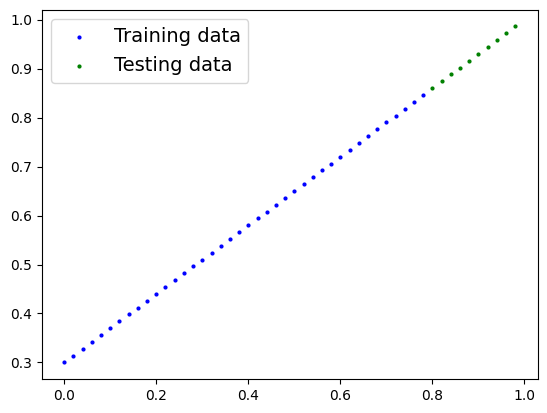

In [40]:
plot_predictions()

In [41]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x):
        return x * self.weight + self.bias

In [42]:
model = LinearRegression()
list(model.parameters()), model.state_dict()

([Parameter containing:
  tensor([-0.9373], requires_grad=True),
  Parameter containing:
  tensor([-0.8465], requires_grad=True)],
 OrderedDict([('weight', tensor([-0.9373])), ('bias', tensor([-0.8465]))]))

## Inference: testing on test data

In [43]:
with torch.inference_mode():
    y_predictions = model(X_test)

y_predictions

tensor([[-1.5963],
        [-1.6151],
        [-1.6338],
        [-1.6526],
        [-1.6713],
        [-1.6901],
        [-1.7088],
        [-1.7276],
        [-1.7463],
        [-1.7651]])

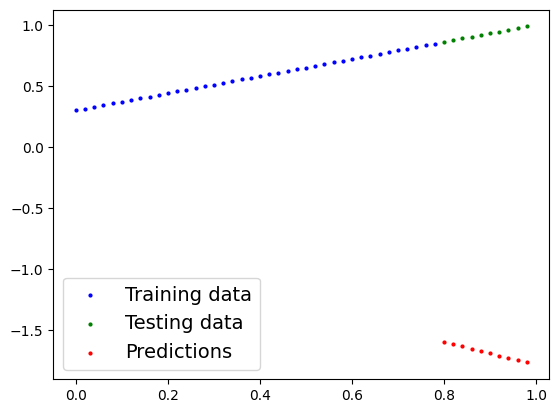

In [44]:
plot_predictions(predictions=y_predictions)

## Training

In [45]:
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

Pytorch training loop
- Forward pass
- Calculate the loss
- Zero gradients
- Perform backpropagation on the loss
- Update parameters through the optimizer

In [46]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    prediction = model(X_train)
    train_loss = criterion(prediction, Y_train)
    model.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_prediction = model(X_test)
        test_loss = criterion(test_prediction, Y_test.type(torch.float))

    if epoch % 10 == 0:
        train_losses.append(train_loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.7850269079208374 | MAE Test Loss: 2.590222120285034 
Epoch: 10 | MAE Train Loss: 1.6698172092437744 | MAE Test Loss: 2.455512523651123 
Epoch: 20 | MAE Train Loss: 1.5546071529388428 | MAE Test Loss: 2.320802688598633 
Epoch: 30 | MAE Train Loss: 1.4393974542617798 | MAE Test Loss: 2.1860928535461426 
Epoch: 40 | MAE Train Loss: 1.3241875171661377 | MAE Test Loss: 2.0513827800750732 
Epoch: 50 | MAE Train Loss: 1.2089776992797852 | MAE Test Loss: 1.916672945022583 
Epoch: 60 | MAE Train Loss: 1.093767762184143 | MAE Test Loss: 1.7819631099700928 
Epoch: 70 | MAE Train Loss: 0.9785577058792114 | MAE Test Loss: 1.6472532749176025 
Epoch: 80 | MAE Train Loss: 0.8633477091789246 | MAE Test Loss: 1.5125432014465332 
Epoch: 90 | MAE Train Loss: 0.7481378316879272 | MAE Test Loss: 1.377833366394043 
Epoch: 100 | MAE Train Loss: 0.6329278349876404 | MAE Test Loss: 1.2431232929229736 
Epoch: 110 | MAE Train Loss: 0.5177177786827087 | MAE Test Loss: 1.108413457870483

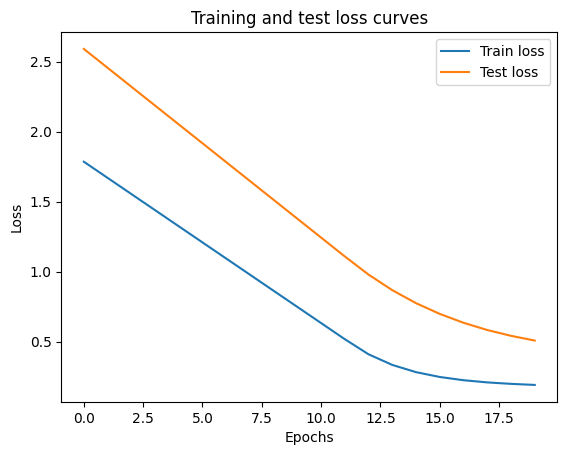

In [47]:
plt.plot(train_losses, label="Train loss")
plt.plot(test_losses, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [48]:
model.state_dict()

OrderedDict([('weight', tensor([-0.2261])), ('bias', tensor([0.6405]))])

## Making predictions

In [49]:
model.eval()

with torch.inference_mode():
    predictions = model(X_test)

predictions

tensor([[0.4596],
        [0.4551],
        [0.4506],
        [0.4461],
        [0.4415],
        [0.4370],
        [0.4325],
        [0.4280],
        [0.4235],
        [0.4189]])

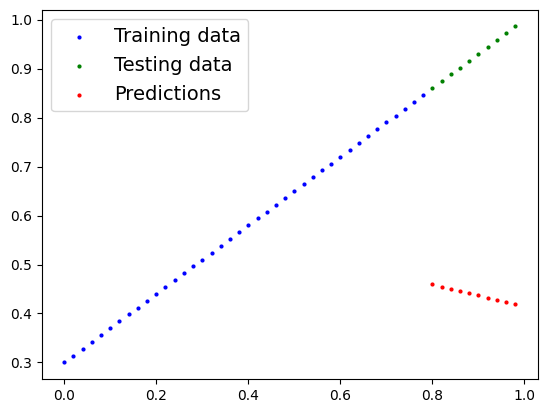

In [50]:
plot_predictions(predictions=predictions)

## Linear Model

In [51]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

In [52]:
torch.manual_seed(42)
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [53]:
epochs = 100
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    prediction = model(X_train)
    train_loss = criterion(prediction, Y_train)
    model.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        prediction = model(X_test)
        test_loss = criterion(prediction, Y_test.type(torch.float))

    if epoch % 10 == 0:
        train_losses.append(train_loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5739762187004089 
Epoch: 10 | MAE Train Loss: 0.4399680495262146 | MAE Test Loss: 0.4392663538455963 
Epoch: 20 | MAE Train Loss: 0.3247582018375397 | MAE Test Loss: 0.30455657839775085 
Epoch: 30 | MAE Train Loss: 0.20954827964305878 | MAE Test Loss: 0.16984674334526062 
Epoch: 40 | MAE Train Loss: 0.09433844685554504 | MAE Test Loss: 0.03513689711689949 
Epoch: 50 | MAE Train Loss: 0.023886386305093765 | MAE Test Loss: 0.04784906655550003 
Epoch: 60 | MAE Train Loss: 0.0199567973613739 | MAE Test Loss: 0.04580312222242355 
Epoch: 70 | MAE Train Loss: 0.016517987474799156 | MAE Test Loss: 0.0375305712223053 
Epoch: 80 | MAE Train Loss: 0.013089170679450035 | MAE Test Loss: 0.029944902285933495 
Epoch: 90 | MAE Train Loss: 0.009653178043663502 | MAE Test Loss: 0.02167237363755703 


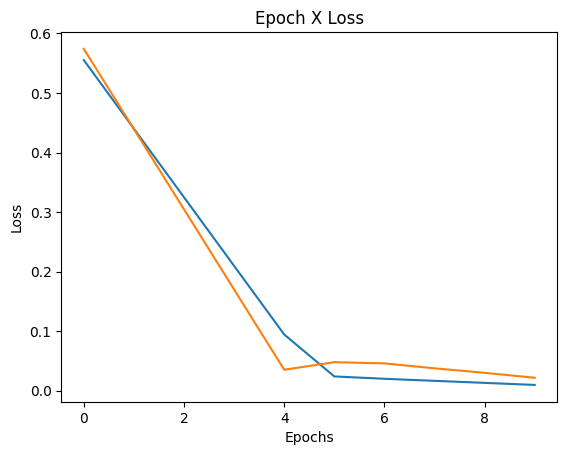

In [54]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Epoch X Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

## Exercise

Create a straight line dataset using the linear regression formula (weight * X + bias).

- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.

In [55]:
def linear(X):
    weight = 0.3
    bias = 0.9
    return weight * X + bias

In [57]:
X = torch.randn(100)
Y = linear(X)
X, Y

(tensor([-0.3891,  0.5279,  1.0311, -0.7048,  1.0131, -0.3308,  0.5177,  0.3878,
          0.7200,  0.4114, -0.5733,  0.5069, -0.4752, -0.4920,  0.2704, -0.5628,
          0.6547,  0.5760, -0.3609, -0.0606,  0.0733,  0.8187,  1.4805,  0.3449,
         -0.6867,  0.6368,  0.2176, -0.0467, -1.4335, -0.5665, -0.4253,  0.2625,
         -0.7328,  0.1043,  1.0414, -0.3997, -2.2933,  0.4976, -0.4257, -1.3371,
         -1.1955,  0.8123, -0.3063, -0.3302, -0.9808,  0.1947, -1.6535,  0.6814,
          0.1748, -1.0939,  0.9633, -0.3095,  0.5712,  1.1179, -1.2956,  0.0503,
          0.7755,  2.0265,  0.9812, -0.6401, -0.4908,  0.2080, -1.1586, -0.9637,
         -1.1360, -0.5226,  0.7165,  1.5335, -1.4510, -0.7861, -0.9563, -1.2476,
          0.7043,  0.7099, -1.5326, -0.7251,  0.4664,  0.6667, -0.0439,  0.2368,
          0.4788,  1.3537, -0.1593, -0.4249,  1.1340, -0.3556,  0.3618,  1.9993,
          0.6630,  0.7047, -0.0045,  1.6668, -1.0809, -0.7839,  0.5071,  0.0821,
          0.4440, -0.7240, -

In [61]:
threshold = .8
split_threshold = int(len(X) * threshold)
X_train = X[:split_threshold]
X_test = X[split_threshold:]
Y_train = Y[:split_threshold]
Y_test = Y[split_threshold:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

80


(80, 80, 20, 20)

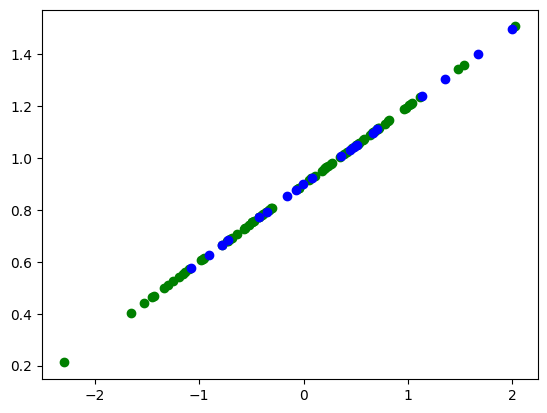

In [63]:
def plot_model(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test, predictions=None):
    plt.scatter(X_train, Y_train, c='green', label='Train')
    plt.scatter(X_test, Y_test, c='blue', label='Test')
    
    if predictions is not None:
        plt.scatter(X_test, predictions, c="red", label="Predictions")
    
    plt.show()

plot_model()

Build a PyTorch model by subclassing nn.Module.

- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().

In [72]:
class LinearRegressionExercise(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x):
        return self.weight * x + self.bias

m = LinearRegressionExercise()
m.state_dict()

OrderedDict([('weight', tensor([-1.3798])), ('bias', tensor([1.1960]))])

Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.


Epoch: 0 | MAE Train Loss: 1.205403447151184 | MAE Test Loss: 1.149412751197815 
Epoch: 20 | MAE Train Loss: 1.1054140329360962 | MAE Test Loss: 1.053221583366394 
Epoch: 40 | MAE Train Loss: 1.0054242610931396 | MAE Test Loss: 0.9570305943489075 
Epoch: 60 | MAE Train Loss: 0.9054346084594727 | MAE Test Loss: 0.8608395457267761 
Epoch: 80 | MAE Train Loss: 0.8054450154304504 | MAE Test Loss: 0.7646484971046448 
Epoch: 100 | MAE Train Loss: 0.7056209444999695 | MAE Test Loss: 0.6689587831497192 
Epoch: 120 | MAE Train Loss: 0.6058640480041504 | MAE Test Loss: 0.5734361410140991 
Epoch: 140 | MAE Train Loss: 0.5061074495315552 | MAE Test Loss: 0.4779137969017029 
Epoch: 160 | MAE Train Loss: 0.4063565731048584 | MAE Test Loss: 0.3824630379676819 
Epoch: 180 | MAE Train Loss: 0.30667346715927124 | MAE Test Loss: 0.28747662901878357 
Epoch: 200 | MAE Train Loss: 0.20699043571949005 | MAE Test Loss: 0.19249017536640167 
Epoch: 220 | MAE Train Loss: 0.10730735957622528 | MAE Test Loss: 0.09

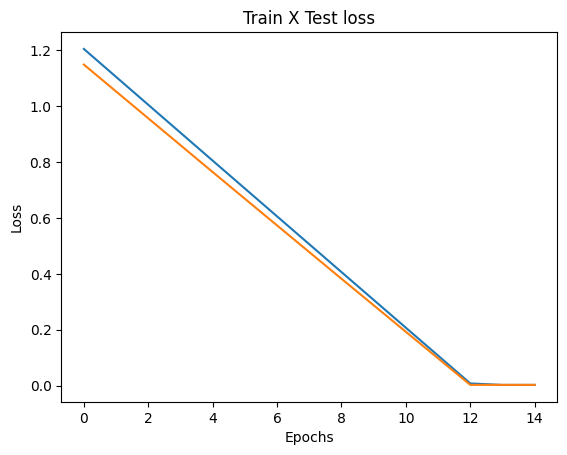

In [73]:
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params=m.parameters(), lr=0.01)
epochs = 300
train_losses = []
test_losses = []

for epoch in range(epochs):
    m.train()
    prediction = m(X_train)
    train_loss = criterion(prediction, Y_train)
    m.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        m.eval()

        with torch.inference_mode():
            prediction = m(X_test)
            test_loss = criterion(prediction, Y_test.type(torch.float))

        train_losses.append(train_loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")

plt.plot(train_losses)
plt.plot(test_losses)
plt.title('Train X Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data

In [78]:
m.eval()

with torch.inference_mode():
    predictions = m(X_test)

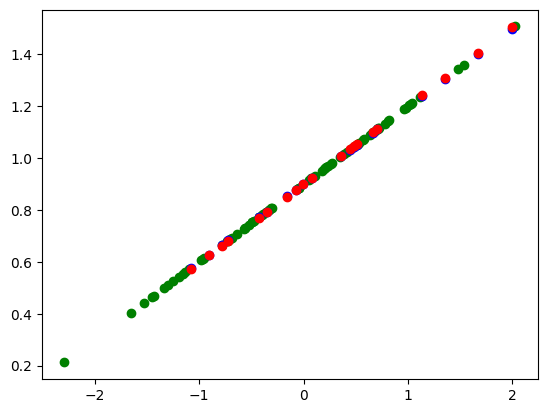

In [79]:
plot_model(predictions=predictions)